In [1]:
#config matplotlib to not use dynamic figures
%matplotlib inline
#config matplotlib backend to generate low weight pngs
%config InlineBackend.figure_format = 'png'
#initialize workspace
%run _init.py
sRoot = '../img/';

# Power

In [60]:
#Overview Figure

ds = [2, 7];
xDomain = (-8,13);
alpha = 0.05;

h0 = stats.norm(loc=0,scale=2);
has = [];
for d in ds:
  has.append(stats.norm(loc=d,scale=2));

X = np.linspace(xDomain[0],xDomain[1],500);

CIs = [];
distDots = [];
for DIST in [h0]+has:
  gaussVariates = DIST.rvs(5000);
  gaussDots = st.makeDots(gaussVariates,type='con');
  gaussDots.pop('kernel')
  distDots.append(gaussDots);
  CIs.append(np.percentile(gaussVariates, q=(1-alpha)*100));

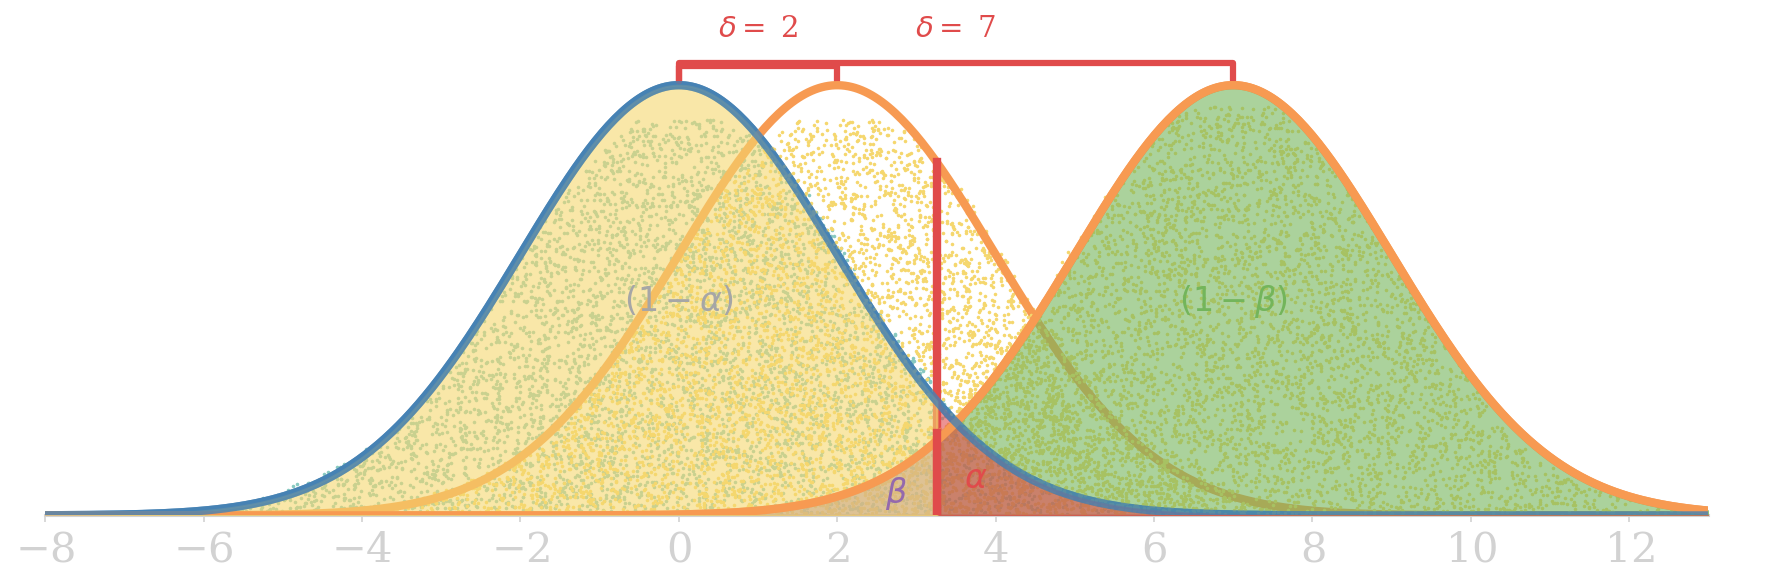

In [91]:
fig = pyp.figure(figsize=(12,4));
ax = fig.subplots();
axs = utils.multiX(ax,n=len(ds)+1,concatOriginal=True,concatFirst=False)
xLines = np.arange(xDomain[0],xDomain[1],2);

# Plot h0
axs[-1].plot(X, h0.pdf(X),color = col['satBlue'],lw=4,zorder=200);
axs[-1].scatter(**distDots[0],color=col['blue'],s=0.5);
axs[-1].axvline(CIs[0], ymax=h0.pdf(CIs[0])/2, color=col['red'],zorder=300,lw=4);

# format
#axs[-1].axis('off');
axs[-1].spines['left'].set_visible(False);
axs[-1].set_yticks([])
axs[-1].tick_params(axis='x', labelsize = 20);
axs[-1].set_xticks(xLines);
axs[-1].set_xlim(sorted(xDomain));
axs[-1].set_ylim((0,axs[-1].get_ylim()[1]*1.1));


## plot  the rest of the axes
for aI in range(0,len(axs)-2):
  axs[aI].plot(X, has[aI].pdf(X),color = col['orange'],lw=4,zorder=200);
  axs[aI].scatter(**distDots[aI+1],color=col['yellow'],s=0.5);

  # format
  axs[aI].axis('off');
  axs[aI].set_xlim(sorted(xDomain));
  axs[aI].set_ylim((0,axs[-1].get_ylim()[1]));
  
  ffr = 0.125/(2*aI+1);
  axs[aI].annotate(
    '',
    xy = (0,h0.pdf(0)),
    xytext = (ds[aI], has[aI].pdf(ds[aI])),
    arrowprops = dict(
      arrowstyle='-',
      connectionstyle=f'bar,fraction={ffr:.2f}',
      facecolor = col['red'],
      edgecolor = col['red'],
      linewidth=3
    )
  );
  axs[aI].text(
    np.mean([0,ds[aI]]),
    h0.pdf(0)*1.1,
    r'$\delta =$'+f' {ds[aI]:.0f}',
    color=col['red'],
    size=14,
    ha='center',
    va='bottom'
  );
  axs[aI].axvline(CIs[0], ymax=has[aI].pdf(CIs[0])/axs[aI].get_ylim()[1], color=col['red'],zorder=300,lw=4);




# shade only for the high power
axs[-2].plot(X, has[-1].pdf(X),color = col['orange'],lw=4,zorder=200,gid="DLINE");
axs[-2].plot(X, h0.pdf(X),color = col['satBlue'],lw=4,zorder=200,alpha=0.8,gid="NULLLINE");
axs[-2].axvline(CIs[0], ymax=has[-1].pdf(CIs[0])/axs[-2].get_ylim()[1], color=col['red'],zorder=300,lw=4,gid="ALPHALINE");
powFillX = np.linspace(CIs[0], np.max(X), 500);
typeIIFillX = np.linspace(np.min(X),CIs[0], 500);

#power
axs[-2].fill_between(
  powFillX,
  has[-1].pdf(powFillX),
  color = col['green'],
  alpha = 0.6,
  gid="POWFILL_fill"
);
axs[-2].text(
  ds[-1],
  has[-1].pdf(ds[-1])/2,
  r'$(1-\beta)$',
  color = col['green'],
  size=16,
  ha='center',
  va='center',
  gid="POWFILL_text",
  zorder=201
);
# beta
axs[-2].fill_between(
  typeIIFillX,
  has[-1].pdf(typeIIFillX),
  color = col['purple'],
  alpha = 0.6,
  gid="BETAFILL_fill"
);
axs[-2].text(
  2.75,
  has[-1].pdf(2.75)/2,
  r'$\beta$',
  color = col['purple'],
  size=16,
  ha='center',
  va='center',
  gid="BETAFILL_text",
  zorder=201
);

# alpha
axs[-2].fill_between(
  powFillX,
  h0.pdf(powFillX),
  color = col['red'],
  alpha = 0.6,
  gid="ALPHAFILL_fill"
);
axs[-2].text(
  3.75,
  h0.pdf(3.75)/2,
  r'$\alpha$',
  color = col['red'],
  size=16,
  ha='center',
  va='center',
  gid="ALPHAFILL_text",
  zorder=201
);

#1-alpha
# beta
axs[-2].fill_between(
  typeIIFillX,
  h0.pdf(typeIIFillX),
  color = col['yellow'],
  alpha = 0.6,
  gid="TRUEFILL_fill"
);
axs[-2].text(
  0,
  h0.pdf(0)/2,
  r'$(1-\alpha)$',
  color = col['grey2'],
  size=16,
  ha='center',
  va='center',
  gid="TRUEFILL_text",
  zorder=201
);

axs[-2].axis('off');

axs[-2].set_xlim(sorted(xDomain));
axs[-2].set_ylim((0,axs[-1].get_ylim()[1]));

fig.tight_layout();

fig.savefig(sRoot+'powerOverview.svg', transparent=True);

# Bendectin Malformations

In [2]:
observed=pd.DataFrame(
    np.float_([[13,382], [1156, 48731]]),
    index=['Malformed', 'Normal'], 
    columns=['Bendectin', 'Control']
);
observed

,Bendectin,Control
Malformed,13.0,382.0
Normal,1156.0,48731.0


In [10]:
bootObs = st.chi2boot(observed,B=5000);

In [11]:
bootAlpha = np.percentile(bootObs['Bootstraps'], 95)
bootObs['pvalue']

0.1952

In [12]:
riskObserved = pd.DataFrame(
    st.getRisk(observed.as_matrix()),
    index=['Malformed', 'Normal'], 
    columns=['Bendectin', 'Control']
);
riskObserved

,Bendectin,Control
Malformed,0.011121,0.007778
Normal,0.988879,0.992222


In [16]:
# First let's try for X2

#set alpha false positive rate to test against
alpha = 0.05; 

#let's test current design power
#collect Ns for each group
Ns = [np.int64(observed.sum(axis=0).as_matrix())];
'''
Bendectin     1169.0
Control      49113.0

is list of 2 element array:
[array([  1169.,  49113.])]
'''
# power placeholder
POW = np.zeros(len(Ns)); #one set for now

nIndex = 0; #this could be a for loop for all testable Ns we have 1 for now though
B=10000;
# NULL phantom
nullX2 = np.zeros(B);
for b in range(B):
    '''
    In the null world, bendectin and control have the same outcome risk so we simulate with random choice
    giving each group the observed Ns Ns[nIndex][0] is bendectin, and 1 in control
    riskObserved['Control'] will give us control risk of Malformed,Normal in that order
    so we need to make our sample cases the same
    '''
    bendectin = np.random.choice(['Malformed', 'Normal'], size=Ns[nIndex][0], p=riskObserved['Control']);
    control = np.random.choice(['Malformed', 'Normal'], size=Ns[nIndex][1], p=riskObserved['Control']);
    # get counts
    bTable = np.unique(bendectin,return_counts=True);
    cTable = np.unique(control,return_counts=True);
    # construct contingency table
    nullTable = pd.DataFrame(
        np.hstack([ bTable[1].reshape((-1,1)), cTable[1].reshape((-1,1)) ]),
        index=bTable[0], #use count ordering both should be the same 
        columns=['Bendectin', 'Control']
    );
    nullX2[b] = st.chi2(nullTable);
# EFFECT phantom
effectX2 = np.zeros(B);
for b in range(B):
    '''
    Note the only difference is that the bendectin group gets the bendectin risk
    '''
    bendEffect = np.random.choice(['Malformed', 'Normal'], size=Ns[nIndex][0], p=riskObserved['Bendectin']);
    contEffect = np.random.choice(['Malformed', 'Normal'], size=Ns[nIndex][1], p=riskObserved['Control']);
    # get counts
    bETable = np.unique(bendEffect,return_counts=True);
    cETable = np.unique(contEffect,return_counts=True);
    # construct contingency table
    effectTable = pd.DataFrame(
        np.hstack([ bETable[1].reshape((-1,1)), cETable[1].reshape((-1,1)) ]),
        index=bETable[0], #use count ordering both should be the same 
        columns=['Bendectin', 'Control']
    );
    effectX2[b] = st.chi2(effectTable);

In [22]:
# Calculate power
# first we need to know what the null distribution threshold at alpha is:
# since this is chiquared, we only want one-sided
NullCritical = np.percentile(nullX2, q=(1-alpha)*100);
print(NullCritical)
POW[nIndex] = np.mean(effectX2 > NullCritical)
print(POW)

3.8358178675313024
[0.2786]


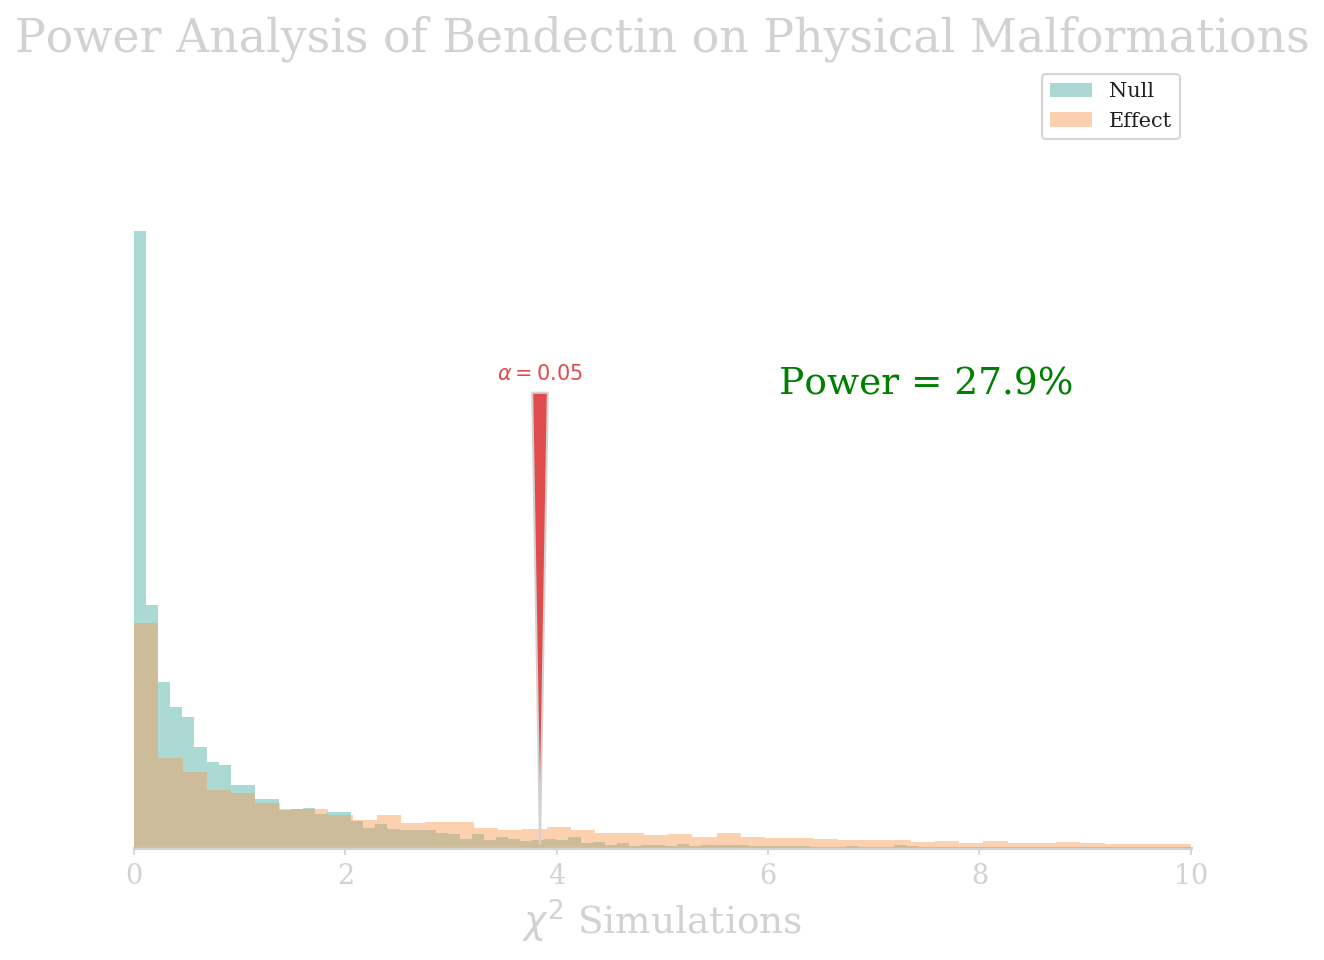

In [25]:
fig,axs = pyp.subplots(figsize=(9,6.5), dpi=150);

axs = utils.multiX(axs,n=2,concatOriginal=True,concatFirst=True);
# histograms
h1= axs[0].hist(nullX2, color=col['blue'], bins = 'fd', density=True, alpha=0.7, label = 'Null');
h2= axs[1].hist(effectX2, color=col['orange'],bins = len(h1[0]), density=True, alpha = 0.45, label = 'Effect');
axs[0].set_xlim((0,10));
for ax in axs:
  ax.set_ylim(
      np.min([axs[a].get_ylim()[0] for a in [0,1]]),
      np.max([axs[a].get_ylim()[1] for a in [0,1]])*1.1
    );
# group 2
axs[2].annotate(
  r'$\alpha = 0.05$',
  xy = (bootAlpha,0),
  xytext = (bootAlpha,axs[0].get_ylim()[1]*0.65),
  color = col['red'],
  size=10,
  ha = 'center',
  va = 'bottom',
  arrowprops= {
    'arrowstyle': 'wedge,tail_width=0.75',
    'edgecolor': col['grey'],
    'facecolor': col['red']
  },
  zorder=100
);

axs[2].text(
  7.5, axs[0].get_ylim()[1]*0.65,
  f'Power = {POW[0]*100:.1f}%',
  color='green',
  size=18,
  ha='center',
  va='center'
);

axs[0].set_xlabel(r'$\chi^2$ Simulations');
axs[0].set_title(r'Power Analysis of Bendectin on Physical Malformations',size=22);
#format axes for plotting
for ax in axs:
  #reset ylim
  ax.set_xlim(
    np.min([axs[a].get_xlim()[0] for a in [0,1]]),
    np.max([axs[a].get_xlim()[1] for a in [0,1]])
  );
  ax.patch.set_alpha(0);
  ax.spines['left'].set_visible(False);
  ax.set_yticks([]);
  ax.set_ylim(
    np.min([axs[a].get_ylim()[0] for a in [0,1]]),
    np.max([axs[a].get_ylim()[1] for a in [0,1]])
  );
  if ax is not axs[0]:
    ax.axis('off');

leg = fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
for text in leg.get_texts():
    text.set_color(col['dkGrey']);
fig.tight_layout();

fig.savefig(sRoot+'Bendectin_X2.svg', transparent=True);

## Dinosaur Eggs

In [2]:
realWorld = np.array((338, 331, 311, 301, 278, 277, 250, 336, 340, 276));
effectSizes = range(5,41,5);
sampleSizes = range(4,61,2);

#use only our data
X = realWord.copy();
Y = realWorld.copy();

# create a function for computing desired effect
def effectFunction(x,y,center=np.mean):
  return center(x)-center(y)
# use d to mean effect:: get zero effects
d0 = effectFunction(X,Y);




5
10
15
20
25
30
35
40


[None, None, None, None, None, None, None, None]